In [196]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [197]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 150)
        self.fc2 = nn.Linear(150, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [198]:
model = NN(12288, 2)
x = torch.randn(64, 12288)
print(model(x).shape)

torch.Size([64, 2])


In [199]:
input_size = 12288
num_classes = 2
learning_rate = 0.008
batch_size = 32
num_epochs = 100

In [200]:
device = torch.device('cpu')

In [201]:
# import zipfile
# import os

# zip_file = 'homer_bart.zip'
# extraction_path = 'dataset/'

# os.makedirs(extraction_path, exist_ok=True)
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall(extraction_path)
# extracted_files = os.listdir(extraction_path)

In [202]:
data_transforms = transforms.Compose([
    transforms.Resize((64, 64)),   # Resize images to 64x64 pixels
    transforms.ToTensor(),         # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [203]:
data_dir = 'dataset'
image_data = datasets.ImageFolder(data_dir, transform=data_transforms)

train_size = int(0.9 * len(image_data))
test_size = len(image_data) - train_size
train_data, test_data = random_split(image_data, [train_size, test_size])

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(image_data, batch_size=batch_size, shuffle=True)

In [204]:
model = NN(input_size = input_size, num_classes = num_classes).to(device)

In [205]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.01)

In [206]:
train_losses = []

for epoch in range(num_epochs):
    epoch_losses = []
    for batch_idx, (data, targets) in enumerate(train_dataloader):
        data == data.to(device=device)
        targets = targets.to(device=device)
        data = data.reshape(data.shape[0], -1)
        
        #fwd prop
        scores = model(data)
        loss = loss_fn(scores, targets)
        
        #bwd prop
        optimizer.zero_grad()
        loss.backward()
        
        #grad_descent
        optimizer.step()
        
        epoch_losses.append(loss.item())
    
    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    train_losses.append(epoch_loss)
    
    print (f"epoch: {epoch+1}/{num_epochs} ---> loss = {round(epoch_loss, 3)}")
    
    if (epoch_loss < 0.01):
        break

epoch: 1/100 ---> loss = 70.85
epoch: 2/100 ---> loss = 6.826
epoch: 3/100 ---> loss = 0.632
epoch: 4/100 ---> loss = 0.772
epoch: 5/100 ---> loss = 1.361
epoch: 6/100 ---> loss = 0.444
epoch: 7/100 ---> loss = 0.935
epoch: 8/100 ---> loss = 1.025
epoch: 9/100 ---> loss = 0.635
epoch: 10/100 ---> loss = 1.095
epoch: 11/100 ---> loss = 3.497
epoch: 12/100 ---> loss = 1.988
epoch: 13/100 ---> loss = 0.594
epoch: 14/100 ---> loss = 0.559
epoch: 15/100 ---> loss = 1.265
epoch: 16/100 ---> loss = 3.034
epoch: 17/100 ---> loss = 2.571
epoch: 18/100 ---> loss = 0.948
epoch: 19/100 ---> loss = 0.521
epoch: 20/100 ---> loss = 0.587
epoch: 21/100 ---> loss = 0.296
epoch: 22/100 ---> loss = 0.372
epoch: 23/100 ---> loss = 0.228
epoch: 24/100 ---> loss = 0.562
epoch: 25/100 ---> loss = 0.163
epoch: 26/100 ---> loss = 3.291
epoch: 27/100 ---> loss = 0.652
epoch: 28/100 ---> loss = 0.274
epoch: 29/100 ---> loss = 0.686
epoch: 30/100 ---> loss = 0.321
epoch: 31/100 ---> loss = 0.16
epoch: 32/100 --->

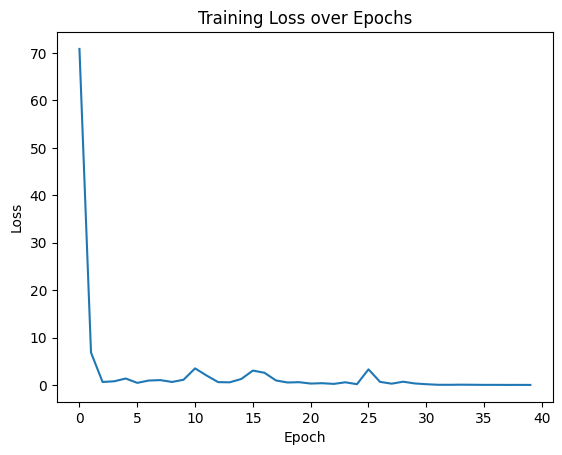

In [207]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [208]:
def accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _,pred = scores.max(1)
            num_correct += (pred == y).sum()
            num_samples += pred.size(0)
            
        acc = (float(num_correct) /float(num_samples)*100)
        
    model.train()
    return acc 

In [209]:
train_acc = accuracy(train_dataloader, model)
test_acc = accuracy(test_dataloader, model)

In [210]:
print(f"train_accuracy = {round(train_acc, 3)}")
print(f"test_accuracy = {round(test_acc, 3)}")

train_accuracy = 100.0
test_accuracy = 97.026
